In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# pass the path for yoyr dataset 
%cd /content/drive/MyDrive/your_project_folder/


/content/drive/MyDrive/Linear_Regression_Projects_exercises


In [3]:
# importing dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
#  data split and transformation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [6]:
# evaluatiuon metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import learning_curve    




In [8]:
# models


# ! pip3 install catboost
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


In [9]:
# from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

In [10]:
# plot size and style 
sns.set(style="whitegrid")


In [11]:
# saving the model
from joblib import dump

In [12]:
dataset_path = "path of your dataset"

In [13]:
df= pd.read_csv(dataset_path)

# EDA

In [14]:
df.shape

(159, 7)

In [15]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [16]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [17]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [18]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [19]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


- For the target variable "Weight", the difference between the min and max value seems to be significantly large.This could be the presens of outliers.

In [20]:
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

In [21]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

- There is no missing data present in the dataset.



In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [23]:
df.Species.value_counts()


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

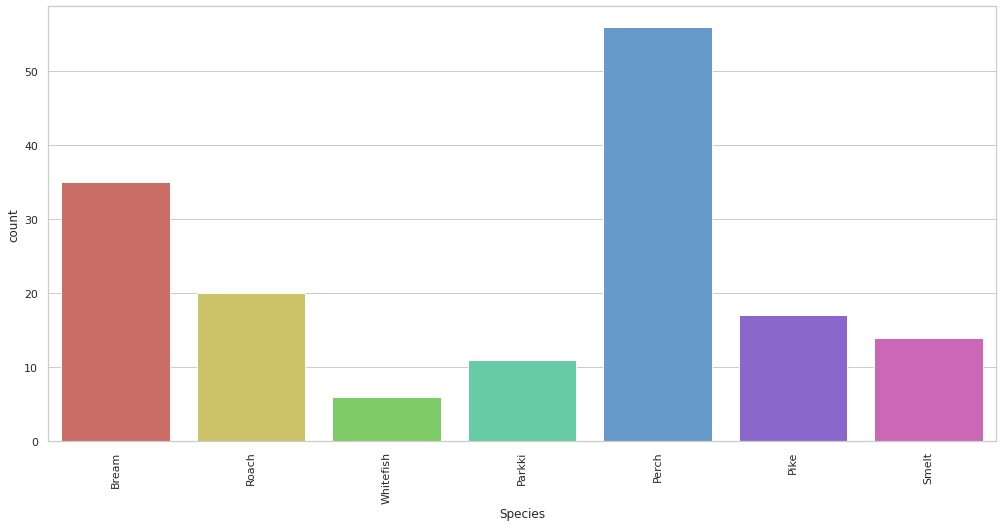

In [24]:
plt.figure(figsize=(17,8))
sns.countplot("Species",data=df,palette="hls")
plt.xticks(rotation=90)

plt.show()

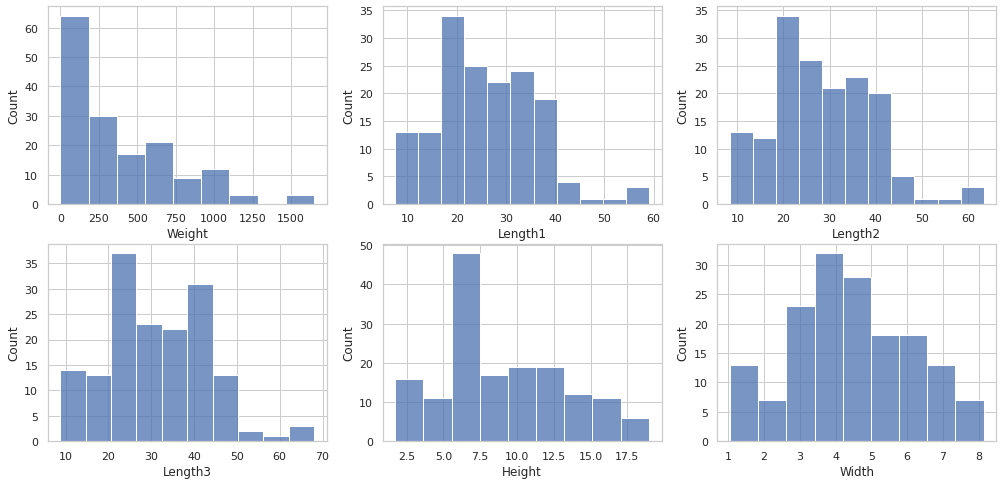

In [25]:

cols = ['Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']
fig,ax = plt.subplots(2,3,figsize = (17,8))
for i in range(len(cols)):
  r = i//3
  c = i%3
  cn = cols[i]
  # ax[r,c].hist(df[cn])
  sns.histplot(df[cn],ax=ax[r,c])
fig.show()





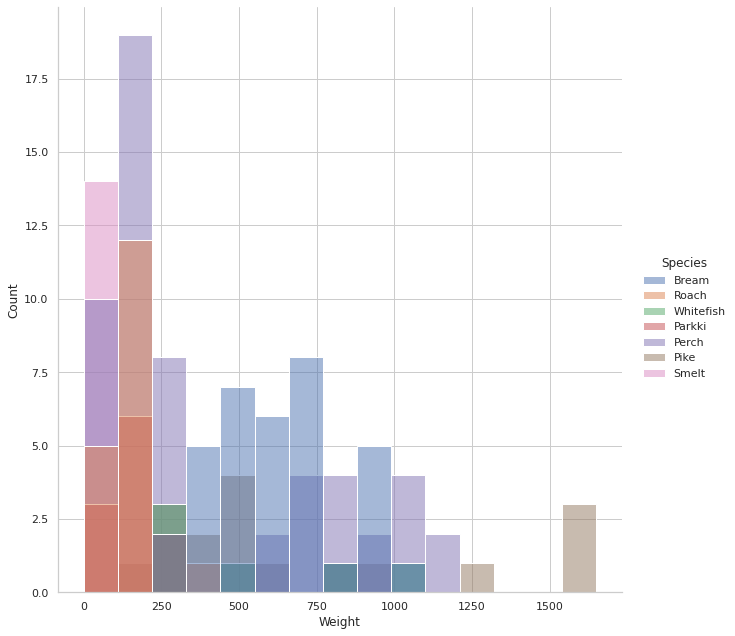

In [26]:
# The distribution of the target variable(Weight) with respect to fish Species
sns.displot(data=df,
             x = "Weight",
             hue="Species",
             height = 9,
             bins=15
             )
plt.show()

- Target variable distribution w.r.t species shows that some species like Pike have huge weight compared to others. This gives us additional information on how the “species” feature can be used for prediction.

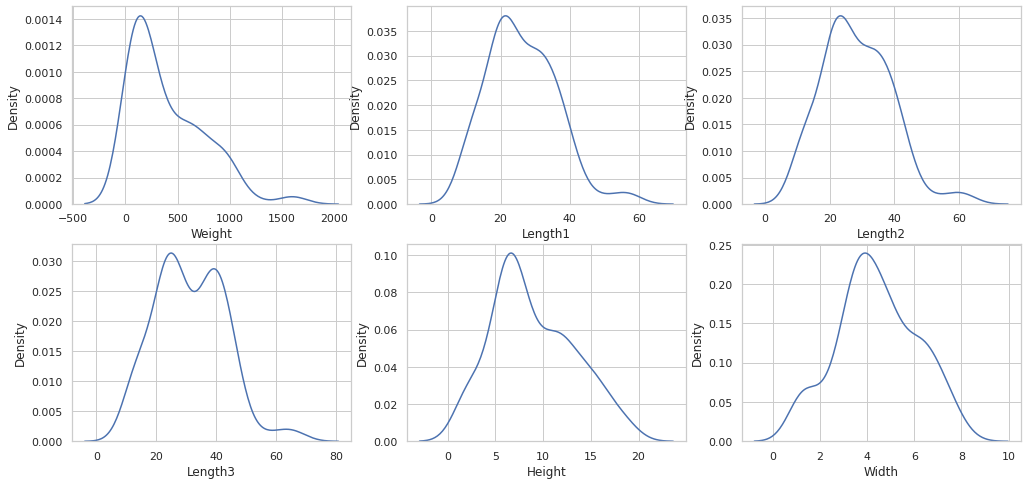

In [27]:
#  checking the distribution of the data
cols = ['Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']
fig,ax = plt.subplots(2,3,figsize = (17,8))
for i in range(len(cols)):
  r = i//3
  c = i%3
  cn = cols[i]
  # ax[r,c].hist(df[cn])
  sns.kdeplot(df[cn],ax=ax[r,c])
fig.show()

- The distributions look skewed.

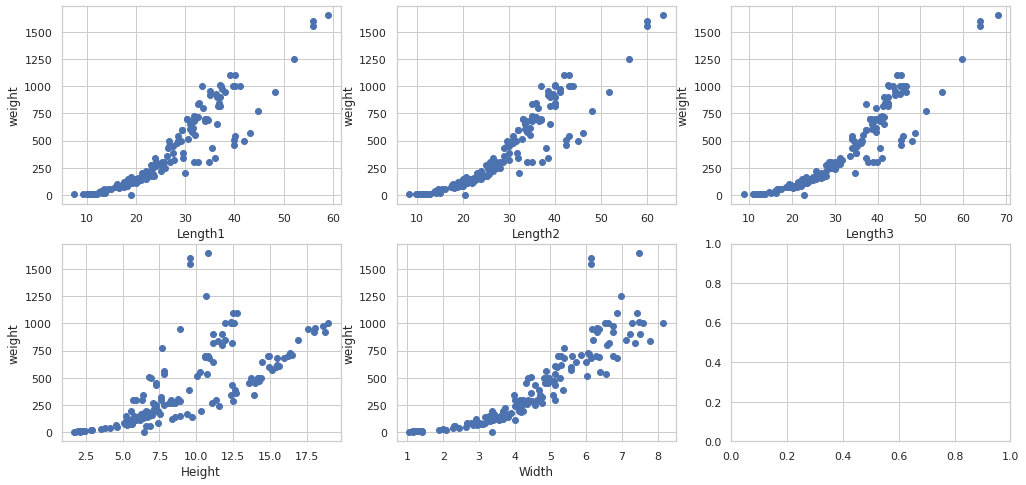

In [28]:
# checking for linear relationship between features and the target variable
features = [ 'Length1', 'Length2', 'Length3', 'Height','Width']
fig,ax = plt.subplots(2,3,figsize = (17,8))
for i in range(len(features)):
  r = i//3
  c = i%3
  f = features[i]
  ax[r,c].scatter(x = df[f].values,y = df["Weight"].values)
  ax[r,c].set_xlabel(f)
  ax[r,c].set_ylabel("weight")
fig.show()


- The relationship between the features and the target variable is not linear. 

In [29]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


- All the features are showing strong correlation with the target vaibale weight. 
- The 3 Length variables are showing collinearity. 

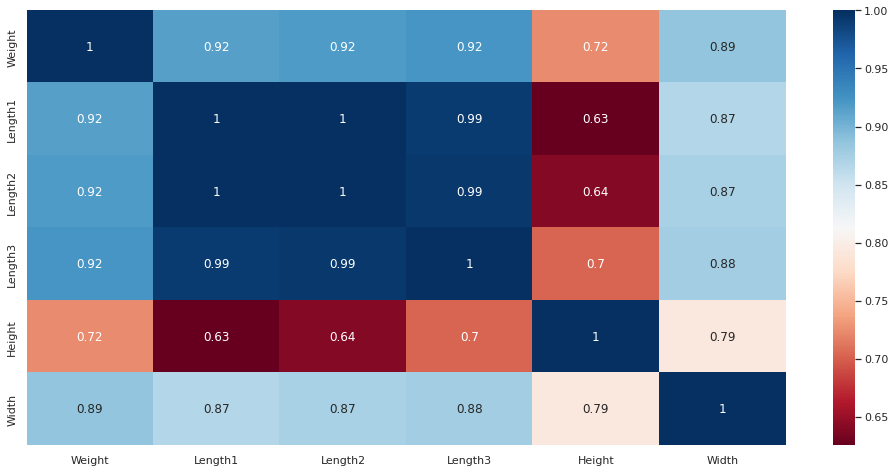

In [30]:
# checking the correlation between  all variables 
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True,cmap="RdBu")
plt.show()

- The pairwise correlation of columns shows that all the numerical features have a positive correlation to the Weights.
- E,G the higher the lengths or width, the higher the weight is. It seems logical as well.

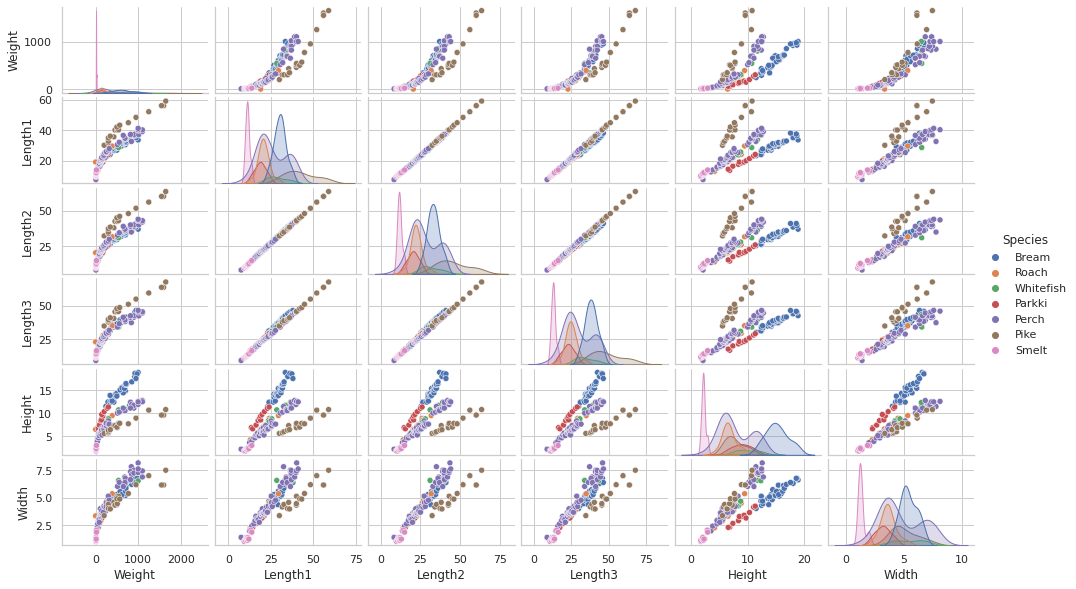

In [31]:
g = sns.pairplot(df,hue="Species")
g.fig.set_figheight(8)
g.fig.set_figwidth(15)
plt.show()

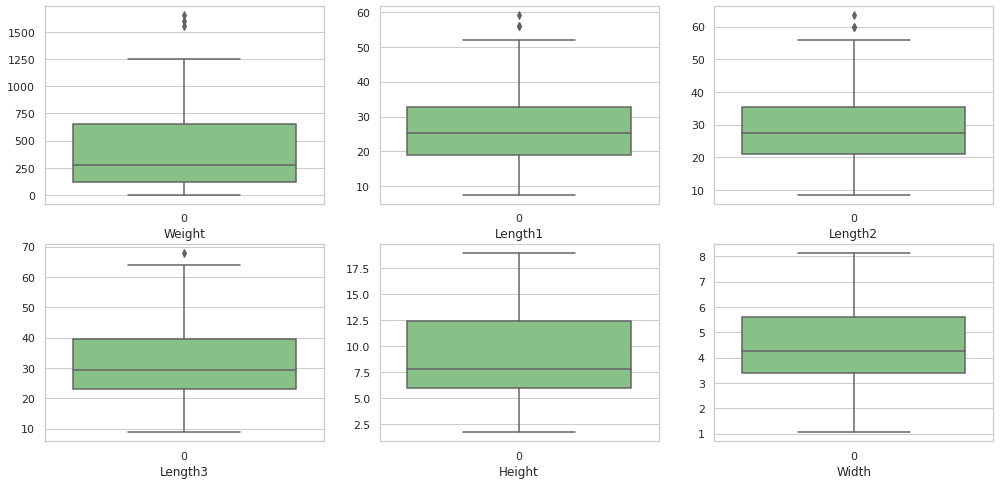

In [32]:
# checking for dataset outliers 

fig,ax = plt.subplots(2,3,figsize = (17,8))
for i in range(len(cols)):
  r = i//3
  c = i%3
  cn = cols[i]
  sns.boxplot(data = df[cn],ax=ax[r,c],palette='Accent')
  ax[r,c].set_xlabel(cn)
plt.show()


- There outliers present in target variable "Weight" and features "Lenght1", "Length2" and "Length3". Rest of the data looks good.


In [33]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [34]:
# remove outlier from the dataset
def spot_outliers(col):
  Q3 = col.quantile(0.75)
  Q1 = col.quantile(0.25)
  IQR = Q3-Q1
  lower_limit = Q1 -(1.5*IQR)
  upper_limit = Q3 + (1.5 *IQR)
  col_outliers = col[(col<lower_limit)|(col>upper_limit)]
  return  col_outliers






**Why “1.5” in IQR Method of Outlier Detection? read [here](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097#:~:text=Well%2C%20as%20you%20might%20have,perceived%20as%20outlier(s).)**




In [35]:
for col in cols:
  print(col)
  print("_____________________________")
  print(spot_outliers(df[col]))
  print("_____________________________")


Weight
_____________________________
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64
_____________________________
Length1
_____________________________
142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64
_____________________________
Length2
_____________________________
142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64
_____________________________
Length3
_____________________________
144    68.0
Name: Length3, dtype: float64
_____________________________
Height
_____________________________
Series([], Name: Height, dtype: float64)
_____________________________
Width
_____________________________
Series([], Name: Width, dtype: float64)
_____________________________


In [36]:
df[141:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


In [37]:
df_cleaned = df.drop([141,142,143,144])

In [38]:
print(df.shape)
print(df_cleaned.shape)

(159, 7)
(155, 7)


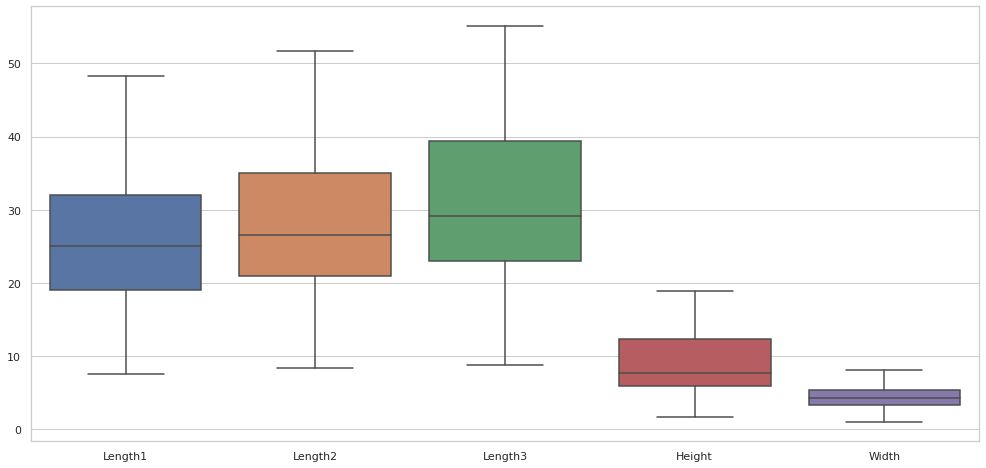

In [39]:
# box plot after removing the outliers 
plt.figure(figsize=(17,8))
ax = sns.boxplot( data=df_cleaned[features])
plt.show()

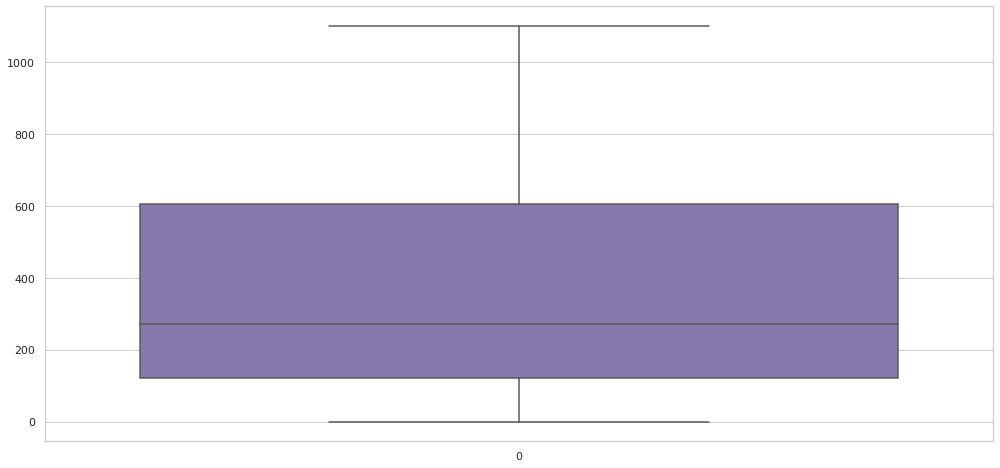

In [40]:
plt.figure(figsize=(17,8))

ax = sns.boxplot( data=df_cleaned.Weight,color="m")


# Data preprocessing 

- Linear models love scaling.
  - In regression, it is often recommended to scale the features so that the predictors have a mean of 0. This makes it easier to interpret the intercept term as the expected value of Y when the predictor values are set to their means.
  - Centering/scaling does not affect your statistical inference in regression models 
-  Stanardization is a type of scaling that involves centering the distribution of the data on the value 0 and the standard deviation to the value 1. The formula for standardization is found  below:-





$$ z = \frac{x_{i} - \mu_{}}{\sigma_{}}$$

- When the distribution of your data follows a Gaussian distribution then Standardization is a good option.

In [41]:

scaler = StandardScaler()


In [42]:
# description of our data before standardization 
df_cleaned.describe()



,Weight,Length1,Length2,Length3,Height,Width
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,369.573548,25.485806,27.604516,30.383226,8.939934,4.358886
std,312.685376,8.897865,9.555969,10.468442,4.336074,1.664295
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,22.950000,5.926950,3.363600
50%,270.000000,25.000000,26.500000,29.200000,7.615600,4.239000
75%,605.000000,32.000000,35.000000,39.350000,12.379300,5.373200
max,1100.000000,48.300000,51.700000,55.100000,18.957000,8.142000


In [43]:
df_normalized= df_cleaned[['Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']]

In [44]:
#  Scale the Numerical features of the data
df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

In [45]:
# description of our data before standardization 
df_normalized.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02
mean,5.730183e-17,-2.478304e-16,-4.870656e-16,3.552714e-16,1.833659e-16,-5.500976e-16
std,1.003241e+00,1.003241e+00,1.003241e+00,1.003241e+00,1.003241e+00,1.003241e+00
min,-1.185765e+00,-2.027914e+00,-2.016202e+00,-2.068425e+00,-1.668539e+00,-1.996052e+00
25%,-8.007491e-01,-7.312799e-01,-6.933807e-01,-7.123620e-01,-6.971169e-01,-5.999610e-01
50%,-3.194787e-01,-5.477507e-02,-1.159586e-01,-1.133943e-01,-3.064123e-01,-7.226749e-02
75%,7.553586e-01,7.344806e-01,7.764212e-01,8.593294e-01,7.957695e-01,6.114314e-01
max,2.343551e+00,2.572319e+00,2.529685e+00,2.368728e+00,2.317658e+00,2.280472e+00


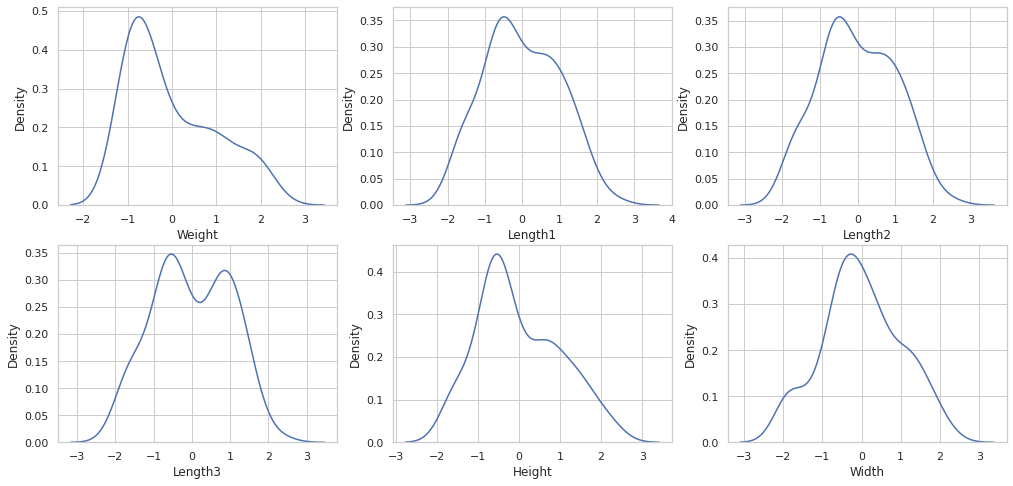

In [46]:

# distribution of the adtaset after the standardization 

fig,ax = plt.subplots(2,3,figsize = (17,8))
for i in range(len(cols)):
  r = i//3
  c = i%3
  cn = cols[i]
  sns.kdeplot(df_normalized[cn],ax=ax[r,c])
fig.show()

In [47]:
# checking for collinerity between the variables
fig = px.imshow(df[cols].corr(), text_auto=True)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    )
fig.show()

The 3 lenght variables are highly correlated. 

- Computing the Multicollinearity of the dataset using(VIF)
  * VIF score of an independent variable represents how well the variable is explained by other independent variables
  * VIF = $1 \over 1- {R^2}$


In [48]:
def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)


In [49]:


calc_vif(df_cleaned[cols])



,variables,VIF
0,Weight,9.374592
1,Length1,13495.931361
2,Length2,15963.700997
3,Length3,3383.996497
4,Height,93.103182
5,Width,96.762706


- dropping the column with the heighst VIF value solve the multicollinearity.

In [50]:
calc_vif(df_cleaned[['Weight', 'Length2', 'Length3', 'Height', 'Width']])

,variables,VIF
0,Weight,8.086074
1,Length2,3246.981245
2,Length3,3338.713529
3,Height,78.655290
4,Width,96.189869


In [51]:
calc_vif(df_cleaned[['Weight', 'Length2', 'Height', 'Width']])

,variables,VIF
0,Weight,7.492448
1,Length2,41.124977
2,Height,15.712745
3,Width,62.573477


In [52]:
calc_vif(df_cleaned[['Weight', 'Length3', 'Height', 'Width']])

,variables,VIF
0,Weight,7.529517
1,Length3,42.286822
2,Height,16.128381
3,Width,53.739555


- let's keep Length3 and dropping the other two length variables from the dataset because Length1 and Length2 trend is highly captured by other variables. We noticee that VIF values for other variables reduced when we drop the two columns. 

In [53]:
df_cleaned = df_cleaned.drop(['Length1','Length2'],axis=1)
df_cleaned.shape

(155, 5)

In [54]:
df_cleaned.columns


Index(['Species', 'Weight', 'Length3', 'Height', 'Width'], dtype='object')

In [55]:
# checking correlation  between  after removing the collinear feeatures 
fig = px.imshow(df_cleaned[['Weight', 'Length3', 'Height', 'Width']].corr(), text_auto=True)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    )
fig.show()

In [56]:
# define input and output of the mode
X = df_cleaned.drop("Weight",axis = 1)
X.shape

(155, 4)

In [57]:
Y = df_cleaned["Weight"]
Y.shape

(155,)

In [58]:
# Encode catagorical labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
X["Species"]= label_encoder.fit_transform(X["Species"].values)


In [59]:
# split the data to train test set
x_train , x_test , y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 4)
(31, 4)
(124,)
(31,)


In [60]:
# apply the feature Scaling on the traning data
X_train_normal = pd.DataFrame(scaler.fit_transform(x_train[['Length3', 'Height', 'Width']]))
X_test_normal = pd.DataFrame(scaler.transform(x_test[['Length3', 'Height', 'Width']]))

# Model Tranning

In [61]:
def eval_metrics(y_pred , y_act):
  mse = round(mean_squared_error(y_pred,y_act),2)
  mae = round(mean_absolute_error(y_pred,y_act),2)
  r_squared = round(r2_score(y_pred,y_act),2)
  return mse,mae,r_squared

In [62]:
from pandas.core.common import random_state
def models_evaluation(model,train_data,val_data,y_val,y_act):
  models = ["Linear_regression","Lasso_Regression","Ridge_Regression","Decission_Tree","Random_Forest",
            "XGboots_Regressor","LGBM_Regressor","CatBoost_Regressor",
            "SGD_Regressor","Kernel_Ridge","Elastic_Net","Bayesian_Ridge",
            "GradientBoosting_Regressor","SVR"]
  # call the models 
  if model == "Linear_regression":
    reg = LinearRegression()
  elif model == "Lasso_Regression":
    reg = Lasso(alpha=0.1,tol=0.03)
  elif model == "Ridge_Regression":
    reg = Ridge(alpha=1.0)
  elif model =="Decission_Tree":
    reg = DecisionTreeRegressor(random_state=42)
  elif model == "Randoem_Forest":
    reg = RandomForestRegressor(random_state=42)
  elif model == "XGboots_Regressor":
     reg = xgb.XGBRegressor(objective="reg:squarederror",random_state = 42)
  elif  model == "LGBM_Regressor":
    reg = LGBMRegressor(random_state=42)
  elif model=="CatBoost_Regressor":
    reg= CatBoostRegressor(random_state=42)
  elif model == "SGD_Regressor":
     reg = SGDRegressor(random_state=42)
  elif model == "Kernel_Ridge" :
    reg = KernelRidge()
  elif model == "Elastic_Net":
    reg = ElasticNet(random_state=42)
  elif model=="Bayesian_Ridge":
    reg = BayesianRidge()
  elif model == "GradientBoosting_Regressor":
    reg = GradientBoostingRegressor(random_state=42)
  else:
    reg = SVR()

  # fiting the models 
  if model in models:
    reg.fit(train_data,y_train)
    pred = reg.predict(val_data)
    mse,mae,r_squared = eval_metrics(pred,y_test)
    return  mse,mae,r_squared


In [63]:

models = ["Linear_regression","Lasso_Regression","Ridge_Regression","Decission_Tree","Random_Forest",
            "XGboots_Regressor","LGBM_Regressor","CatBoost_Regressor",
            "SGD_Regressor","Kernel_Ridge","Elastic_Net","Bayesian_Ridge",
            "GradientBoosting_Regressor","SVR"]

results = []
for model in models:
  res = models_evaluation(model,X_train_normal,X_test_normal,y_train,y_test)
  results.append((model,res[0],res[1],res[2]))
  print(model,res)


In [64]:
df_metrices = pd.DataFrame(results,columns=["model","MSE","MAE","R_squred"])

In [65]:
df_metrices

,model,MSE,MAE,R_squred
0,Linear_regression,10716.16,78.99,0.88
1,Lasso_Regression,10673.32,78.88,0.88
2,Ridge_Regression,10674.57,78.95,0.88
3,Decission_Tree,5260.89,48.01,0.95
4,Random_Forest,118038.65,277.58,-146.42
5,XGboots_Regressor,2752.16,36.17,0.98
6,LGBM_Regressor,2484.70,35.73,0.98
7,CatBoost_Regressor,2731.29,35.63,0.97
8,SGD_Regressor,10552.03,78.72,0.89
9,Kernel_Ridge,153924.40,379.04,-0.70


## Plotting Learning [Curves](https://scikit-learn.org/stable/modules/learning_curve.html) and [Here](https://thedatascientist.com/learning-curves-scikit-learn/)

- A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. 


In [66]:
def learning_curves(model):
    train_sizes, train_scores, valid_scores = learning_curve(model(),x_train,y_train)
    print(train_sizes)
    plt.figure(figsize=(17,8))
    plt.plot(train_sizes,np.mean(train_scores,axis=1),label = "Train")
    plt.plot(train_sizes,np.mean(valid_scores,axis = 1),label = "Val")
    plt.xlabel("Data size")
    plt.ylabel("Score")
    plt.legend()
    plt.show()


[ 9 32 54 76 99]


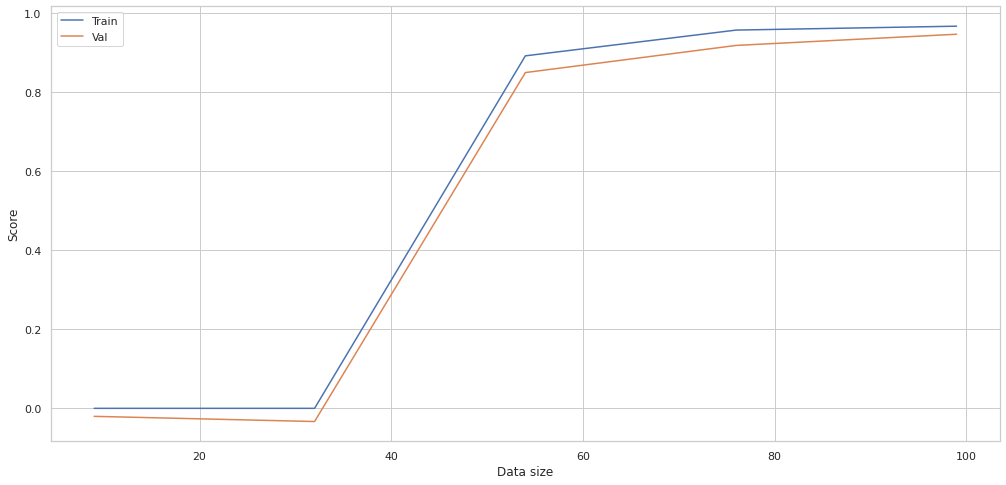

In [67]:
learning_curves(LGBMRegressor)

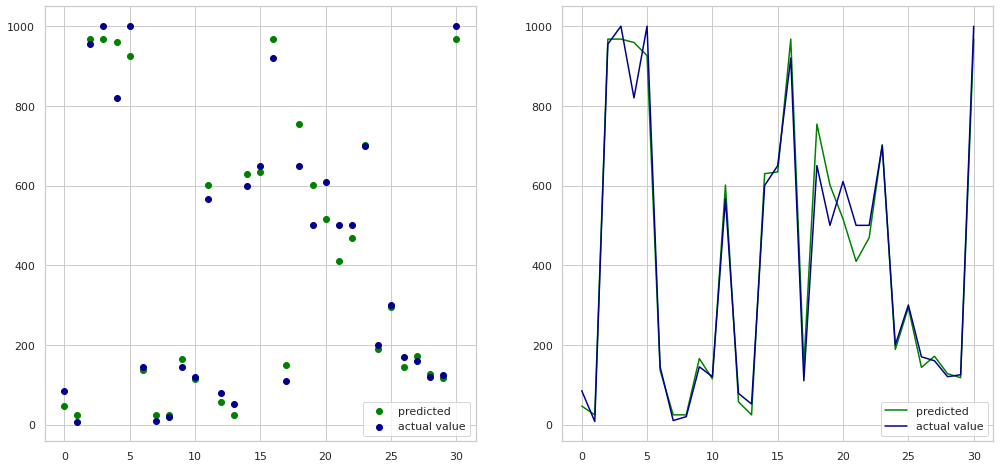

In [68]:
# winner model
reg = LGBMRegressor()
reg.fit(X_train_normal,y_train)
pred = reg.predict(X_test_normal)

plt.figure(figsize=(17,8))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.scatter(range(0,len(X_test_normal)), y_test,color="DarkBlue",label="actual value")
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.plot(range(0,len(X_test_normal)), y_test,color="DarkBlue",label="actual value")
plt.legend()
plt.show()

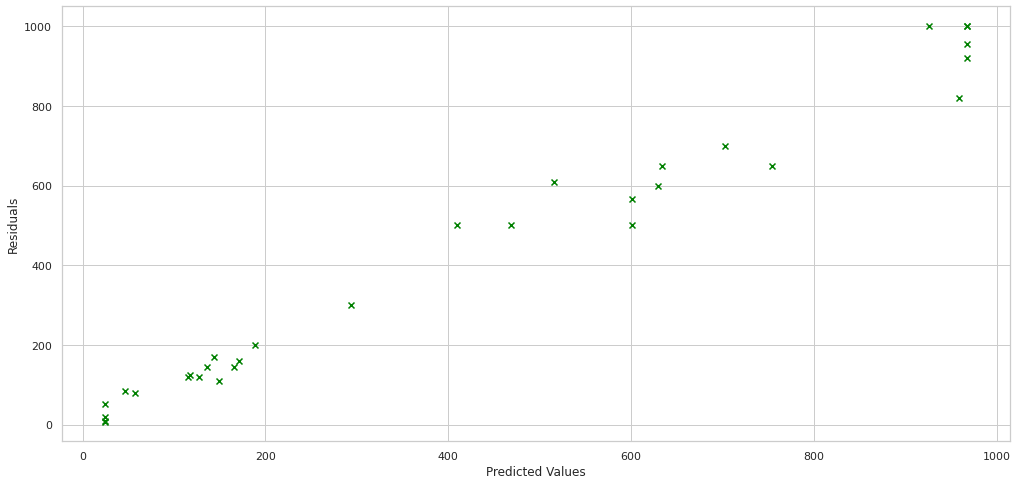

In [69]:

# Residual Plot
plt.figure(figsize=(17,8))
plt.scatter(pred, y_test,marker='x',color="green")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [70]:
from scipy import stats


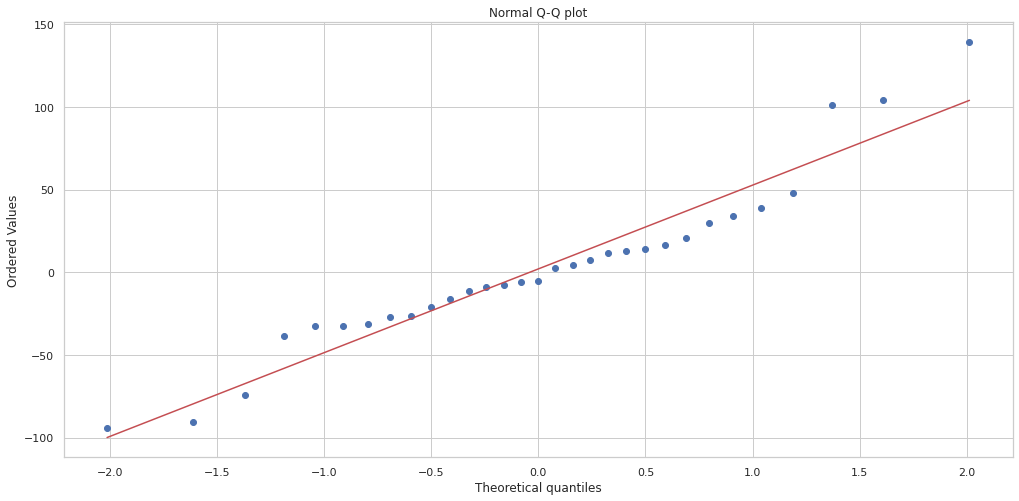

In [71]:
# Normal Q-Q plot
plt.figure(figsize=(17,8))
stats.probplot((pred - y_test), dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

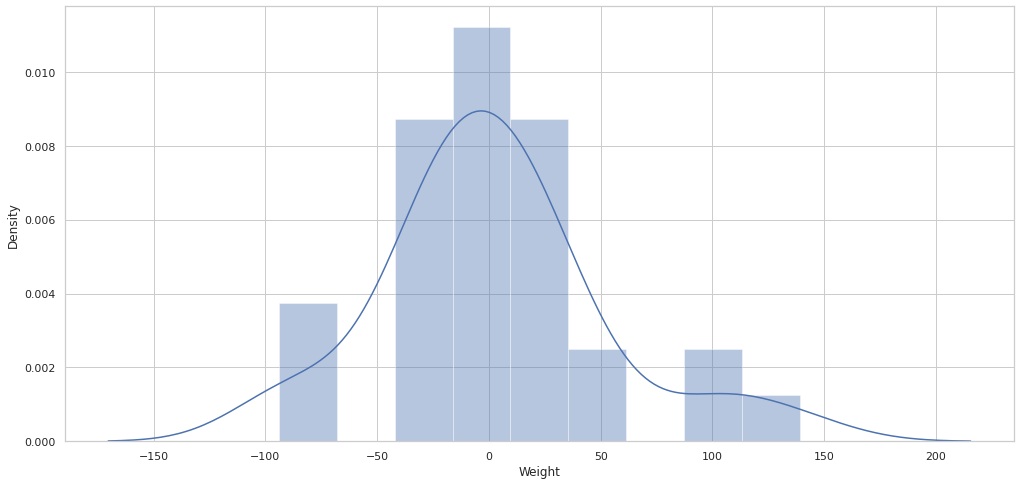

In [72]:
plt.figure(figsize=(17,8))
sns.distplot(pred - y_test)
plt.show()


In [79]:
res_df = pd.DataFrame(dict(Actual=y_test,Prediction=pred))s


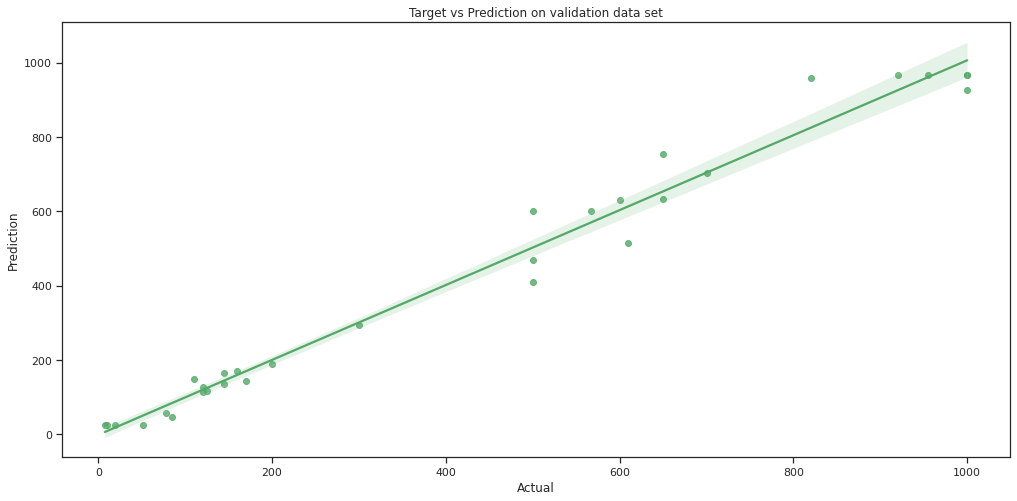

In [92]:
# regplot method is used to plot data and a linear regression model fit. 

plt.figure(figsize=(17,8))
sns.regplot(x='Actual', y='Prediction', data=res_df,color="g")
plt.title("Target vs Prediction on validation data set")
plt.show()

#### Selecting LGBMRegressor as the final winner model for this dataset.



In [ ]:
# Saving the final model
dump(reg, "best_model.joblib")


['best_model.joblib']